In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# RAM
df = pd.DataFrame(pd.read_csv("handpicked.csv", sep=",", skiprows=0))
print(df)

# Time
df2 = pd.DataFrame(pd.read_csv("03_train_tokenizers_stats.csv", sep=",", skiprows=0))
df2 = df2.drop('start_time', axis=1)
df2 = df2.drop('end_time', axis=1)
df2["duration"] = df2["duration"].apply(lambda x: int(str(x).split(":")[0])*60+int(str(x).split(":")[1])+1)
df2["tokenizer_lines"] = df2["tokenizer_lines"].apply(lambda x: int(int(x)/100000))
print(df2)

    sample  GBPeak
0        1       4
1        2       8
2        3      12
3        4      15
4        5      18
5        6      23
6        7      27
7        8      31
8        9      37
9       10      40
10      11      46
11      12      49
12      13      54
13      14      59
14      15      65
    tokenizer_lines  duration
0                 1         1
1                 2         2
2                 3         3
3                 4         4
4                 5         5
5                 6         7
6                 7         8
7                 8         9
8                 9        11
9                10        12
10               11        13
11               12        14
12               13        16
13               14        18
14               15        20


/tmp/ipykernel_150/1256643645.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


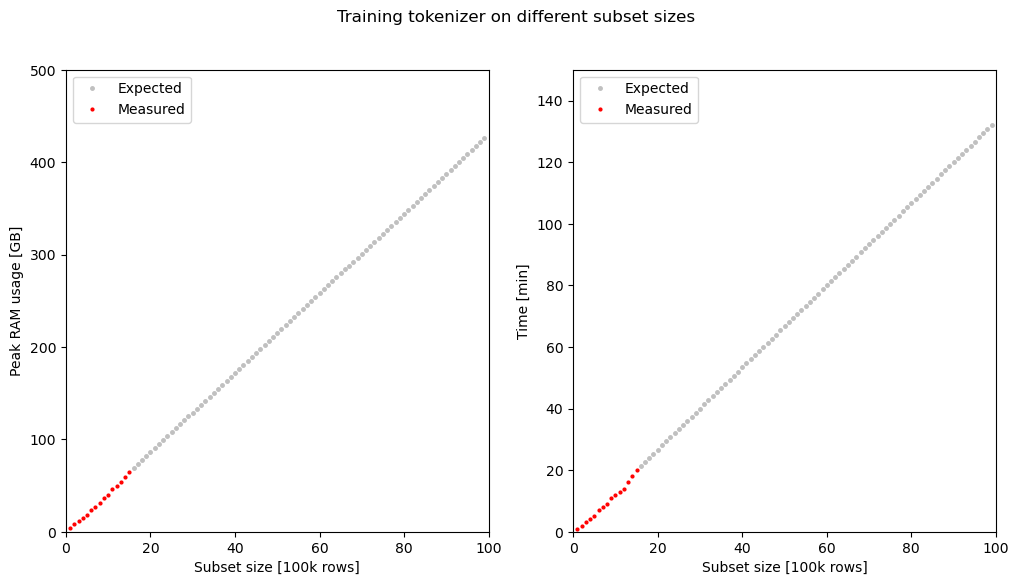

In [13]:
plt.subplots(figsize=(12,6))
plt.subplot(1, 2, 1)
m = 430/100
pointbag_x = range(16, 100)
pointbag_y = []
for x in pointbag_x:
    pointbag_y.append(x*m)
plt.plot(pointbag_x, pointbag_y, label = "Expected",linewidth=1.0, color="silver", linestyle="", marker="o", markersize=2.5)
plt.plot(df["sample"],df["GBPeak"],linestyle="",marker="o", markersize=2, label="Measured", color="red")
plt.ylim(0, 500)
plt.xlim(0,100)
#plt.gca().spines['right'].set_color('none')
#plt.gca().spines['top'].set_color('none')
#plt.title("Training tokenizer on varying subset size")
plt.suptitle('Training tokenizer on different subset sizes')
plt.ylabel("Peak RAM usage [GB]")
plt.xlabel("Subset size [100k rows]")
plt.legend(loc='upper left')
plt.subplot(1, 2, 2)

m2 = 20/15
pointbag_x2 = range(16, 100)
pointbag_y2 = []
for x in pointbag_x2:
    pointbag_y2.append(x*m2)
plt.plot(pointbag_x2, pointbag_y2, label = "Expected",linewidth=1.0, color="silver", linestyle="", marker="o", markersize=2.5)
plt.plot(df2["tokenizer_lines"], df2["duration"],linestyle="",marker="o", markersize=2, label="Measured", color="red")
plt.ylim(0, 150)

plt.ylabel("Time [min]")
plt.xlim(0,100)
#plt.gca().spines['right'].set_color('none')
#plt.gca().spines['top'].set_color('none')
#plt.ylabel("Trained on rows [*100 000]")
plt.xlabel("Subset size [100k rows]")
#plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.95))
plt.legend(loc='upper left')
plt.savefig('plot_tokenizer_ram.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()